<a href="https://colab.research.google.com/github/vickydaiya/The-Sparks-Foundation-Internship/blob/main/Task2_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name: Vicky Amar Daiya**

In [ ]:
#Run if you do not have kneed installed

#!pip install kneed

### **Importing libraries**

In [2]:
from google.colab import files
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

### **Uploading Iris data**

In [ ]:
files.upload()

### **Getting csv data into a Pandas dataframe**

In [ ]:
iris_data = pd.read_csv('Iris.csv')
iris_data.head()

### **Cleaning data**

In [5]:
data = iris_data.drop(['Id','Species'],axis='columns')

### **Elbow method to determine optimum number of clusters**

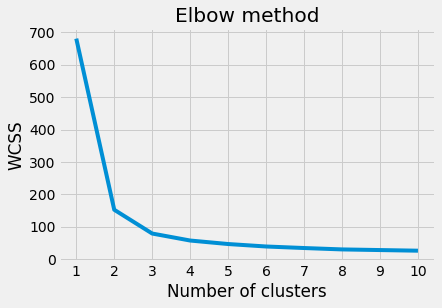

In [6]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")   
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### **Locating the knee of the elbow method graph (optimum number of clusters)**

In [7]:
kl = KneeLocator(range(1,11),wcss, curve="convex", direction="decreasing")
kl.elbow

3

### **Running K-Means with optimum number of clusters from above**

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
predictions = kmeans.fit_predict(data)

### **Visualizing the clusters formed and the actual data**

Text(0.5, 1.0, 'Iris data')

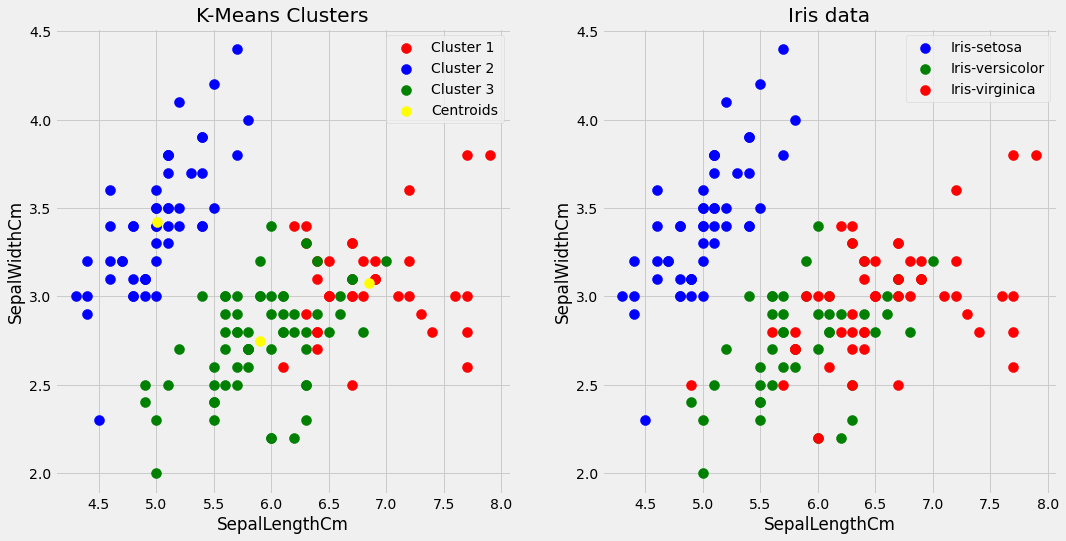

In [47]:
plt.rcParams['figure.figsize'] = [16,8]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(data.iloc[predictions == 0, 0], data.iloc[predictions == 0, 1], 
            s = 100, c = 'red', label = 'Cluster 1')
ax1.scatter(data.iloc[predictions == 1, 0], data.iloc[predictions == 1, 1], 
            s = 100, c = 'blue', label = 'Cluster 2')
ax1.scatter(data.iloc[predictions == 2, 0], data.iloc[predictions == 2, 1],
            s = 100, c = 'green', label = 'Cluster 3')

ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

ax1.legend()

ax1.set(xlabel='SepalLengthCm',ylabel='SepalWidthCm')
ax1.set_title('K-Means Clusters')

ax2.scatter(iris_data[iris_data['Species'] == 'Iris-setosa'].iloc[:,1], iris_data[iris_data['Species'] == 'Iris-setosa'].iloc[:,2], 
            s = 100, c = 'blue', label = 'Iris-setosa')
ax2.scatter(iris_data[iris_data['Species'] == 'Iris-versicolor'].iloc[:,1], iris_data[iris_data['Species'] == 'Iris-versicolor'].iloc[:,2], 
            s = 100, c = 'green', label = 'Iris-versicolor')
ax2.scatter(iris_data[iris_data['Species'] == 'Iris-virginica'].iloc[:,1], iris_data[iris_data['Species'] == 'Iris-virginica'].iloc[:,2],
            s = 100, c = 'red', label = 'Iris-virginica')
ax2.legend()

ax2.set(xlabel='SepalLengthCm',ylabel='SepalWidthCm')
ax2.set_title('Iris data')
